In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -o /content/drive/MyDrive/image_caption.zip -d /content/drive/MyDrive/


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/image_caption/data/Images/3603064161_a8f3b6455d.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/image_caption/data/Images/._3603064161_a8f3b6455d.jpg  
  inflating: /content/drive/MyDrive/image_caption/data/Images/2293149170_38fb2257ea.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/image_caption/data/Images/._2293149170_38fb2257ea.jpg  
  inflating: /content/drive/MyDrive/image_caption/data/Images/2451114871_8617ae2f16.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/image_caption/data/Images/._2451114871_8617ae2f16.jpg  
  inflating: /content/drive/MyDrive/image_caption/data/Images/3711030008_3872d0b03f.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/image_caption/data/Images/._3711030008_3872d0b03f.jpg  
  inflating: /content/drive/MyDrive/image_caption/data/Images/3442978981_53bf1f45f3.jpg  
  inflating: /content/drive/MyDrive/__MACOSX/image_caption/data/Images/._3442978981_53bf1f45f3.

In [2]:
!python3 /content/drive/MyDrive/image_caption/run_pipeline.py

🧹 Cleaning project...
🗑️ Removed old captions.json
🗑️ Removed old processed dataset
✅ Cleanup complete!
Using CUDA GPU
⚡ Generating fresh captions.json from captions.txt...
✅ Saved captions.json for 8092 images at /content/drive/MyDrive/image_caption/data/captions.json
⚠️ Removing junk key 'image' from captions.json
⚠️ Dropped 0 entries (no matching image file found).
<built-in function len>
✅ Preprocessing complete: 6472 train, 809 val, 810 test

🚀 Running /content/drive/MyDrive/image_caption/train.py...

Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100% 97.8M/97.8M [00:00<00:00, 124MB/s]
[Epoch 1/50] Step 50 Loss: 4.6109
[Epoch 1/50] Step 100 Loss: 4.2845
Epoch 1 finished in 329.2s — avg loss 4.9018
[Epoch 2/50] Step 150 Loss: 3.8455
[Epoch 2/50] Step 200 Loss: 3.7395
Epoch 2 finished in 93.1s — avg loss 3.7827
[Epoch 3/50] Step 250 Loss: 3.3967
[Epoch 3/50] Step 300 Loss: 3.286

In [6]:
!python3 /content/drive/MyDrive/image_caption/test.py

Using device: cuda
✅ Loaded checkpoint from latest.pth
✅ Models loaded and ready.
1022454428_b6b660a67b.jpg: a woman in a black shirt and two women in a hot black coat in a city .
102351840_323e3de834.jpg: a person is riding a sledge on the beach
1028205764_7e8df9a2ea.jpg: a group of people are riding a raft in a boat .
103195344_5d2dc613a3.jpg: a boy is jumping on the trampoline in a front of stairs .
1042590306_95dea0916c.jpg: a man in a blue shirt and black hat is sitting on a park .
105342180_4d4a40b47f.jpg: a girl and a girl are playing with a bucket in the water .
1056249424_ef2a2e041c.jpg: a boy in a white shirt and brown dogs playing in the sand with a large stick in the background .
1075867198_27ca2e7efe.jpg: a boy and a girl are playing on the beach with the beach .
1075881101_d55c46bece.jpg: a boy and a person are smiling while someone is walking through the water .
1079274291_9aaf896cc1.jpg: a baby in a white shirt is looking at the camera with his arms crossed .
1093737381

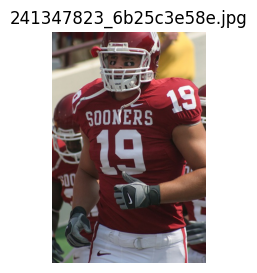

📷 241347823_6b25c3e58e.jpg: a football player during a hockey game .



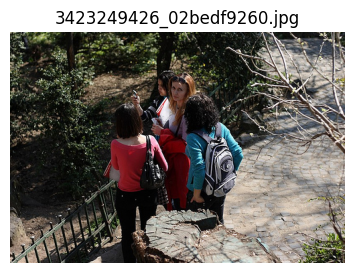

📷 3423249426_02bedf9260.jpg: a group of girls in school uniforms .



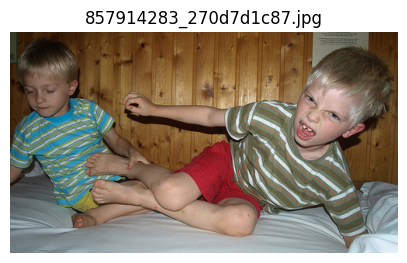

📷 857914283_270d7d1c87.jpg: a baby with a young boy and a young girl are playing in a field



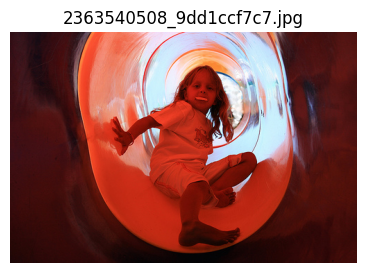

📷 2363540508_9dd1ccf7c7.jpg: a child slides down a red slide .



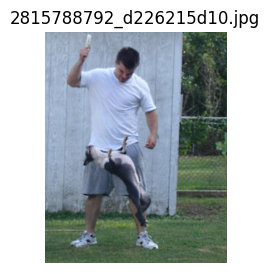

📷 2815788792_d226215d10.jpg: a man in a white dog jumps to catch a ball .



In [11]:
import json
import random
from pathlib import Path
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import cv2  # Import the OpenCV library

BASE_DIR = Path("/content/drive/MyDrive/image_caption")
IMAGE_DIR = BASE_DIR / "data" / "Images"
CAPTIONS_FILE = BASE_DIR / "results" / "generated_captions.json"

# Check if paths exist
if not IMAGE_DIR.exists():
    raise FileNotFoundError(f"Images folder not found at {IMAGE_DIR}")
if not CAPTIONS_FILE.exists():
    raise FileNotFoundError(f"Captions file not found at {CAPTIONS_FILE}")

# Load generated captions
with open(CAPTIONS_FILE, "r") as f:
    captions_dict = json.load(f)

# Pick 5 random images (change to 10 if needed)
sample_images = random.sample(list(captions_dict.keys()), 5)

# Display images with captions
for img_name in sample_images:
    img_path = IMAGE_DIR / img_name
    caption = captions_dict[img_name]

    try:
        # Use cv2 to open the image. It returns a NumPy array.
        img = cv2.imread(str(img_path))

        # Check if the image was loaded correctly
        if img is None:
            print(f"⚠️ Image {img_name} could not be loaded by OpenCV.")
            continue

        # Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Use matplotlib to display the image
        plt.figure(figsize=(5, 3))
        plt.imshow(img_rgb)
        plt.title(f"{img_name}")
        plt.axis('off')  # Hide the axes
        plt.show()

        print(f"📷 {img_name}: {caption}\n")
    except FileNotFoundError:
        print(f"⚠️ Image {img_name} not found at {img_path}")